In [11]:
from zipfile import ZipFile 
with ZipFile('C:/Users/Student/Downloads/archive (1).zip','r') as zObject: 
    zObject.extractall("dataset") 
    zObject.close()

In [113]:
import pathlib
data_dir=pathlib.Path('C:/Users/Student/Downloads/SIH_new')
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3636

In [114]:
image_dict={
    'Acne and Rosacea Photos':list(data_dir.glob('Acne and Rosacea Photos/*.jpg')),
    'Bullous Disease Photos':list(data_dir.glob('Bullous Disease Photos/*.jpg')),
    'Hair Loss Photos Alopecia and other Hair Diseases':list(data_dir.glob('Hair Loss Photos Alopecia and other Hair Diseases/*.jpg')),
    'Melanoma Skin Cancer Nevi and Moles':list(data_dir.glob('Melanoma Skin Cancer Nevi and Moles/*.jpg')),
    'Nail Fungus and other Nail Diseases':list(data_dir.glob('Nail Fungus and other Nail Disease/*.jpg')),
    'Systemic Disease':list(data_dir.glob('Systemic Disease/*.jpg')),
    }

In [115]:
image_dict

{'Acne and Rosacea Photos': [WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07Acne081101.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07AcnePittedScars.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07AcnePittedScars1.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07PerioralDermEye.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07PerioralDermNose.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07PerioralDermq.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07PerioralSteroid1.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07PerlecheAccutane.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07Rhinophyma1.jpg'),
  WindowsPath('C:/Users/Student/Downloads/SIH_new/Acne and Rosacea Photos/07Rhinophyma1a.

In [116]:
image_label_dict={
    'Acne and Rosacea Photos':0,
    'Bullous Disease Photos':1,
    'Hair Loss Photos Alopecia and other Hair Diseases':2,
    'Melanoma Skin Cancer Nevi and Moles':3,
    'Nail Fungus and other Nail Disease':4,
    'Systemic Disease':5,

    }

In [117]:
image_label_dict

{'Acne and Rosacea Photos': 0,
 'Bullous Disease Photos': 1,
 'Hair Loss Photos Alopecia and other Hair Diseases': 2,
 'Melanoma Skin Cancer Nevi and Moles': 3,
 'Nail Fungus and other Nail Disease': 4,
 'Systemic Disease': 5}

In [278]:
from keras.preprocessing.image import ImageDataGenerator as IDG
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train = train_gen.flow_from_directory(data_dir, target_size=(224,224), class_mode="sparse", subset='training', shuffle=True, batch_size=32)
test = train_gen.flow_from_directory(data_dir, target_size=(224,224), class_mode="sparse", subset='validation', shuffle=True, batch_size=32)

Found 2911 images belonging to 6 classes.
Found 725 images belonging to 6 classes.


In [279]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [280]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers, models


In [281]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [282]:
from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [283]:
from tensorflow.keras import layers

In [ ]:
resnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(8, activation='softmax', name='output_layer') # create our own output layer
  ])

In [285]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 dense_46 (Dense)            (None, 512)               1049088   
                                                                 
 dense_47 (Dense)            (None, 512)               262656    
                                                                 
 dense_48 (Dense)            (None, 512)               262656    
                                                                 
 dense_49 (Dense)            (None, 256)               131328    
                                                                 
 dense_50 (Dense)            (None, 128)               32896     
                                                      

In [286]:
resnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
resnet_model.fit(train,validation_data=test,epochs=10)

Epoch 1/10
91/91 [==============================] - 137s 1s/step - loss: 1.0465 - accuracy: 0.6101 - val_loss: 2.2544 - val_accuracy: 0.5048
Epoch 2/10
91/91 [==============================] - 133s 1s/step - loss: 0.8177 - accuracy: 0.7063 - val_loss: 2.8848 - val_accuracy: 0.4414
Epoch 3/10
91/91 [==============================] - 124s 1s/step - loss: 0.7159 - accuracy: 0.7393 - val_loss: 2.3841 - val_accuracy: 0.4193
Epoch 4/10
91/91 [==============================] - 124s 1s/step - loss: 0.5848 - accuracy: 0.7939 - val_loss: 1.9040 - val_accuracy: 0.5324
Epoch 5/10
91/91 [==============================] - 123s 1s/step - loss: 0.5695 - accuracy: 0.7966 - val_loss: 2.0921 - val_accuracy: 0.5448
Epoch 6/10
91/91 [==============================] - 126s 1s/step - loss: 0.5090 - accuracy: 0.8224 - val_loss: 2.1654 - val_accuracy: 0.5752
Epoch 7/10
91/91 [==============================] - 126s 1s/step - loss: 0.4195 - accuracy: 0.8478 - val_loss: 1.7789 - val_accuracy: 0.5959
Epoch 8/10
91

In [216]:
resnet_model.evaluate(test)

23/23 [==============================] - 22s 955ms/step - loss: 2.5480 - accuracy: 0.4910


[2.5479979515075684, 0.49103447794914246]

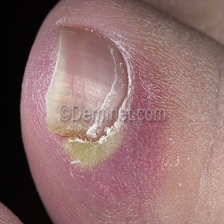

In [273]:
import PIL.Image as Image
img_shape=[224,224]
pred=Image.open('nail2.jpg').resize(img_shape)
pred

In [274]:
import numpy as np
pred=np.array(pred)/255.
pred.shape

(224, 224, 3)

In [275]:
result=resnet_model.predict(pred[np.newaxis,...])
result

1/1 [==============================] - 0s 61ms/step


array([[2.1788279e-07, 3.5456524e-06, 2.1482121e-08, 1.3619734e-07,
        9.9996293e-01, 3.3095781e-05]], dtype=float32)

In [276]:
max = np.argmax(result)

In [277]:
labels=['Acne and Rosacea Photos','Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions','Bullous Disease Photos','Hair Loss Photos Alopecia and other Hair Diseases','Melanoma Skin Cancer Nevi and Moles','Nail Fungus and other Nail Disease','Poison Ivy Photos and other Contact Dermatitis','Systemic Disease']
print(labels[max])

Melanoma Skin Cancer Nevi and Moles


In [267]:
predicted_class_index = np.argmax(result)
predicted_class_probability = result[0][predicted_class_index]
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Pro3ability: {predicted_class_probability}")

Predicted Class Index: 4
Predicted Class Pro3ability: 0.9999629259109497
